In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df = pd.read_csv('full_results.csv')

In [3]:
data = df[(df['data'] == 'mnist') | (df['data'] == 'cifar10')]

In [4]:
data.head()

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
1430,cifar10,resnet,apgd,0.031,baard,0.000,0.159,0.062
1431,cifar10,resnet,apgd,0.031,baard,0.001,0.098,0.034
1432,cifar10,resnet,apgd,0.031,baard,0.000,0.167,0.061
1433,cifar10,resnet,apgd,0.031,baard,0.001,0.175,0.070
1434,cifar10,resnet,apgd,0.031,baard,0.000,0.178,0.067


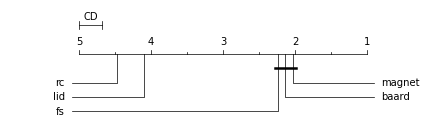

In [5]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

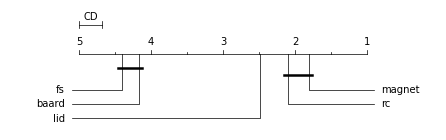

In [6]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Numeric dataset - DNN

In [7]:
data = df[(df['data'] != 'mnist') & (df['model'] == 'dnn')]
data.head()

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
0,banknote,dnn,apgd,0.05,baard,0.688442,0.924623,0.000000
1,banknote,dnn,apgd,0.05,baard,0.728643,0.939698,0.020101
2,banknote,dnn,apgd,0.05,baard,0.722222,0.904040,0.005051
3,banknote,dnn,apgd,0.05,baard,0.756345,0.923858,0.010152
4,banknote,dnn,apgd,0.05,baard,0.744898,0.826531,0.005102


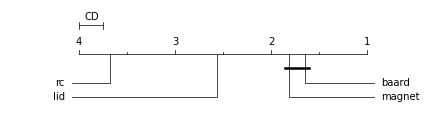

In [8]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_num_dnn.pdf', format='pdf', dpi=1200, bbox_inches='tight')

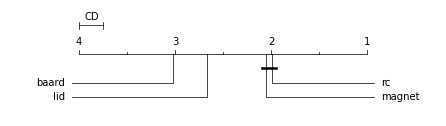

In [9]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_num_dnn.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Numeric - SVM and Tree

In [10]:
data = df[(df['model'] == 'svm') | (df['model'] == 'tree')]
data.head()

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
460,banknote,svm,bim,0.05,baard,0.846939,0.954082,0.005102
461,banknote,svm,bim,0.05,baard,0.846154,0.974359,0.015385
462,banknote,svm,bim,0.05,baard,0.780612,0.928571,0.005102
463,banknote,svm,bim,0.05,baard,0.841837,0.959184,0.015306
464,banknote,svm,bim,0.05,baard,0.780612,0.954082,0.015306


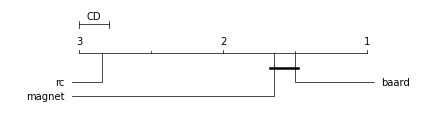

In [11]:
acc = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_num_svm_tree.pdf', format='pdf', dpi=1200, bbox_inches='tight')

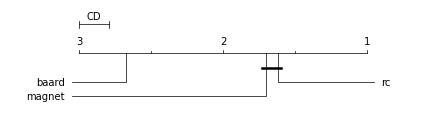

In [12]:
fpr = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['fpr']}, 
    axis=1)
res_fpr = autorank(fpr, order='ascending')
plot_stats(res_fpr)
plt.savefig('nemenyi_fpr_num_svm_tree.pdf', format='pdf', dpi=1200, bbox_inches='tight')